In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

# Stay classification: cluster-splitting with box-refinement & shifting boxes

**24.08.2020**

In [3]:
import numpy as np
import pandas as pd

In [4]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

In [5]:
# #############################################################################
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
from synthetic_data.plotting import add_plot_trajectory, add_plot_seg_boxes, add_plot_cluster_boxplots

In [10]:
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays

# Start here

In [13]:
time_thresh = 1/6
dist_thresh=0.25

In [14]:
from datetime import datetime

data_dir = f"./testdata_training_set__canonical_3stays/"

## Illustration

In [17]:
!ls testdata_training_set__canonical_3stays/results/trajectory*_3stays__?stays_prec0o???_rec0o???.*

testdata_training_set__canonical_3stays/results/trajectory0_3stays__2stays_prec0o976_rec0o980.png
testdata_training_set__canonical_3stays/results/trajectory11_3stays__4stays_prec0o928_rec0o999.png
testdata_training_set__canonical_3stays/results/trajectory1_3stays__0stays_prec0o000_rec0o000.png
testdata_training_set__canonical_3stays/results/trajectory203_3stays__1stays_prec0o981_rec0o999.png
testdata_training_set__canonical_3stays/results/trajectory205_3stays__2stays_prec0o995_rec0o532.png
testdata_training_set__canonical_3stays/results/trajectory209_3stays__1stays_prec0o921_rec0o417.png
testdata_training_set__canonical_3stays/results/trajectory210_3stays__2stays_prec0o991_rec0o787.png
testdata_training_set__canonical_3stays/results/trajectory23_3stays__0stays_prec0o000_rec0o000.png
testdata_training_set__canonical_3stays/results/trajectory247_3stays__2stays_prec0o978_rec0o964.png
testdata_training_set__canonical_3stays/results/trajectory251_3stays__1stays_prec0o986_rec0o998.png
testda

In [18]:
data_dir = f"./testdata_training_set__canonical_3stays/"

trajectory_nr = 11
'''
trajectory214_3stays
trajectory899_3stays__6stays_prec0o877_rec0o986
'''
stays_tag = 3
trajectory_tag = f"trajectory{trajectory_nr}_{stays_tag}stays"    
path_to_file =  data_dir + trajectory_tag

In [19]:
from synthetic_data.trajectory_class import get_pickle_trajectory

t_arr, r_arr, x_arr, segments = get_pickle_trajectory(path_to_file)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, t_arr))

In [20]:
from stay_classification.metric_box_classifier.metric_box_classifier_core import get_mini_clusters
from stay_classification.metric_box_classifier.metric_box_classifier_boxing import extend_clusters, shift_cluster_box
from stay_classification.metric_box_classifier.metric_box_classifier_gaps import merge_clusters_gen
from stay_classification.metric_box_classifier.metric_box_classifier_split import separate_clusters
from stay_classification.metric_box_classifier.metric_box_classifier_mask import get_iqr_filtered_clusters
from stay_classification.metric_box_classifier.metric_box_classifier import get_sorted_clusters

In [21]:
verbose = True

all_clusters = []
stage_titels = []

### Stage 1: get mini-clusters and merging

In [22]:
stage_titel = f"Stage {1}: get mini-clusters and merging"
if verbose: print(stage_titel)
clusters = get_mini_clusters(t_arr, x_arr, dist_thresh, time_thresh)
clusters = get_sorted_clusters(clusters)        
if verbose:
    print(len(clusters), "Clusters:")
    print_clusts(clusters);
    print()
all_clusters.append(clusters.copy())
stage_titels.append(stage_titel)

Stage 1: get mini-clusters and merging
10 Clusters:
[   0, 307]
[ 308, 318]
[ 319, 330]
[ 331, 341]
[ 342, 705]
[ 706, 715]
[ 716, 732]
[ 733, 744]
[ 745, 760]
[ 763, 873]



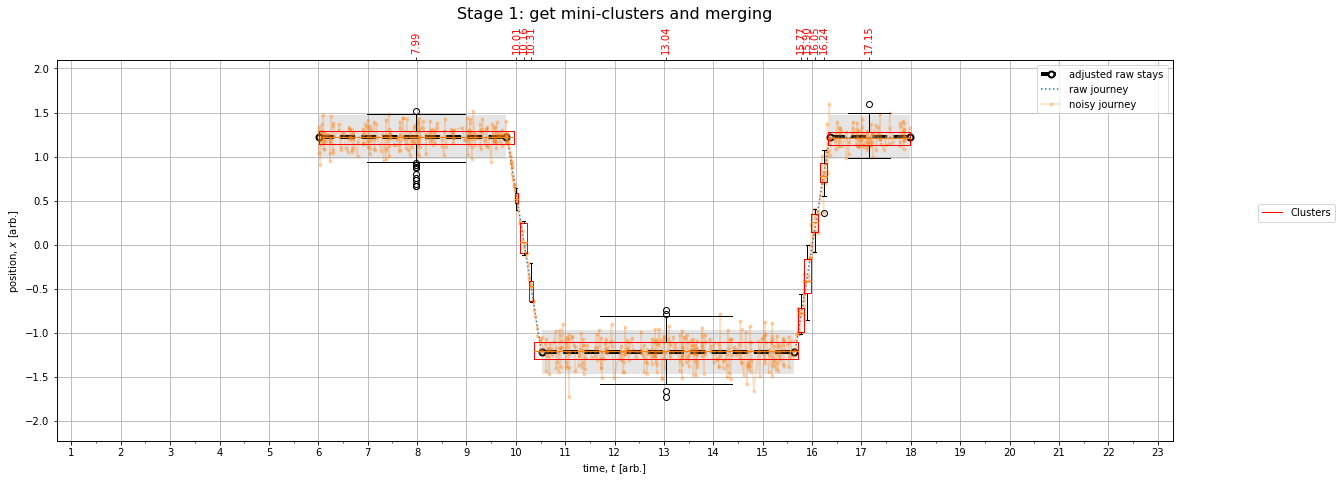

In [23]:
fig, ax = plt.subplots(1,1,figsize=[20,7])

iii = 0

ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.set_xlim(0.7,23.3)
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
add_plot_cluster_boxplots(t_arr, x_arr, all_clusters[-1], dist_thresh, ax)
ax.set_ylim(ylim);
ax.set_title(f"{stage_titels[iii]}", fontsize=16);

### Stage 2: extend clusters and IQR-filter

In [24]:
stage_titel = f"Stage {2}: extend clusters and IQR-filter"
if verbose: print(stage_titel)
clusters = extend_clusters(t_arr, x_arr, clusters, time_thresh)
clusters = get_sorted_clusters(clusters)        
if verbose:
    print(len(clusters), "Clusters:")
    print_clusts(clusters);
    print()
all_clusters.append(clusters.copy())
stage_titels.append(stage_titel)

Stage 2: extend clusters and IQR-filter
7 Clusters:
[   0, 307]
[ 342, 721]
[ 703, 724]
[ 706, 735]
[ 730, 750]
[ 739, 768]
[ 748, 873]



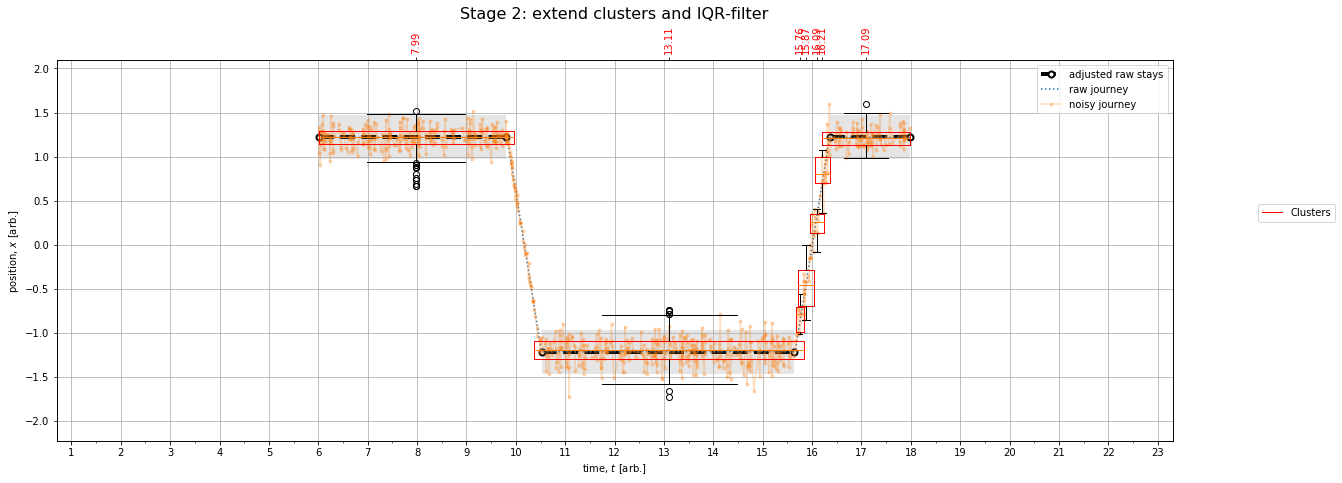

In [25]:
fig, ax = plt.subplots(1,1,figsize=[20,7])

ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.set_xlim(0.7,23.3)
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
add_plot_cluster_boxplots(t_arr, x_arr, all_clusters[-1], dist_thresh, ax)
ax.set_ylim(ylim);
ax.set_title(f"{stage_titels[-1]}", fontsize=16);

### Stage 3: separate overlapping clusters

In [26]:
stage_titel = f"Stage {3}: separate overlapping clusters"
if verbose: print(stage_titel)
clusters = separate_clusters(clusters)
clusters = get_sorted_clusters(clusters)        
if verbose:
    print(len(clusters), "Clusters:")
    print_clusts(clusters);
    print()
all_clusters.append(clusters.copy())
stage_titels.append(stage_titel)

Stage 3: separate overlapping clusters
7 Clusters:
[   0, 307]
[ 342, 702]
[ 703, 724]
[ 725, 729]
[ 730, 750]
[ 751, 768]
[ 769, 873]



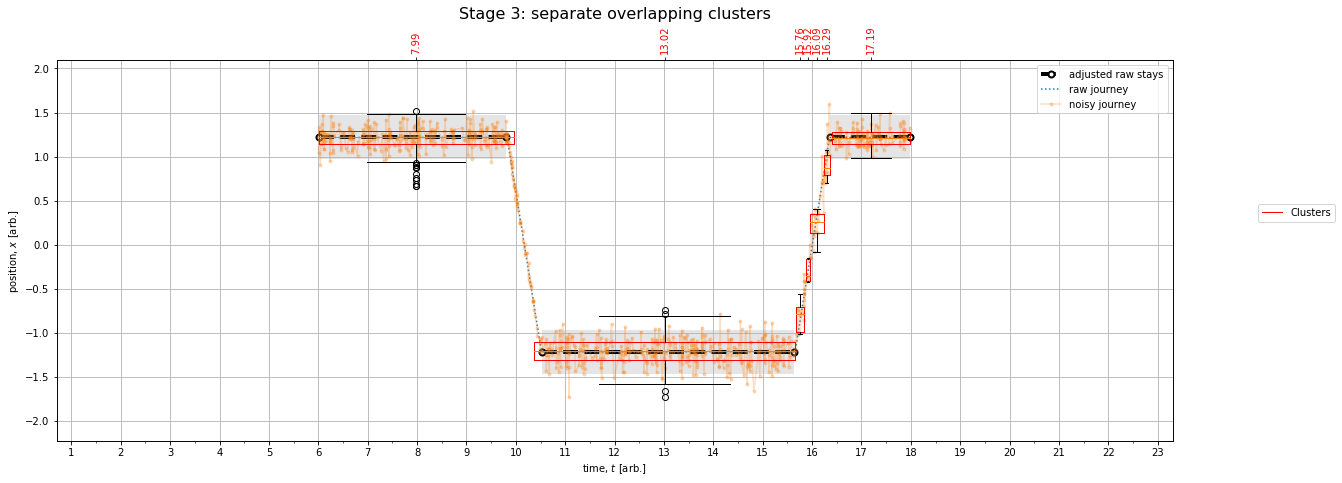

In [27]:
fig, ax = plt.subplots(1,1,figsize=[20,7])

ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.set_xlim(0.7,23.3)
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
add_plot_cluster_boxplots(t_arr, x_arr, all_clusters[-1], dist_thresh, ax)
ax.set_ylim(ylim);
ax.set_title(f"{stage_titels[-1]}", fontsize=16);

### Stage 4: merge nearby clusters

In [28]:
stage_titel = f"Stage {4}: merge nearby clusters"
if verbose: print(stage_titel)
clusters = merge_clusters_gen(t_arr, x_arr, clusters, dist_thresh, time_thresh)
clusters = get_sorted_clusters(clusters)        
if verbose:
    print(len(clusters), "Clusters:")
    print_clusts(clusters);
    print()
all_clusters.append(clusters.copy())
stage_titels.append(stage_titel)

Stage 4: merge nearby clusters
6 Clusters:
[   0, 307]
[ 342, 702]
[ 703, 729]
[ 730, 750]
[ 751, 768]
[ 769, 873]



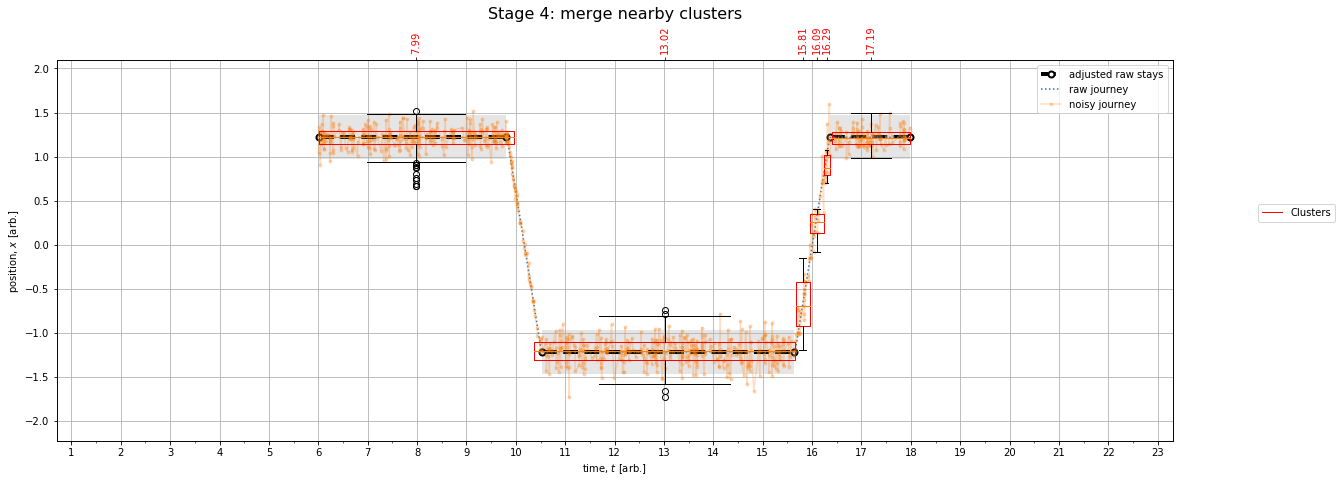

In [29]:
fig, ax = plt.subplots(1,1,figsize=[20,7])

ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.set_xlim(0.7,23.3)
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
add_plot_cluster_boxplots(t_arr, x_arr, all_clusters[-1], dist_thresh, ax)
ax.set_ylim(ylim);
ax.set_title(f"{stage_titels[-1]}", fontsize=16);

### Stage 5: shift the boxes

In [30]:
stage_titel = f"Stage {5}: shift the boxes"
if verbose: print(stage_titel)
clusters = shift_cluster_box(t_arr, x_arr, clusters, time_thresh, dist_thresh)
clusters = get_sorted_clusters(clusters)        
if verbose:
    print(len(clusters), "Clusters:")
    print_clusts(clusters);
    print()
all_clusters.append(clusters.copy())
stage_titels.append(stage_titel)

Stage 5: shift the boxes
4 Clusters:
[   0, 307]
[ 342, 702]
[ 730, 750]
[ 769, 873]



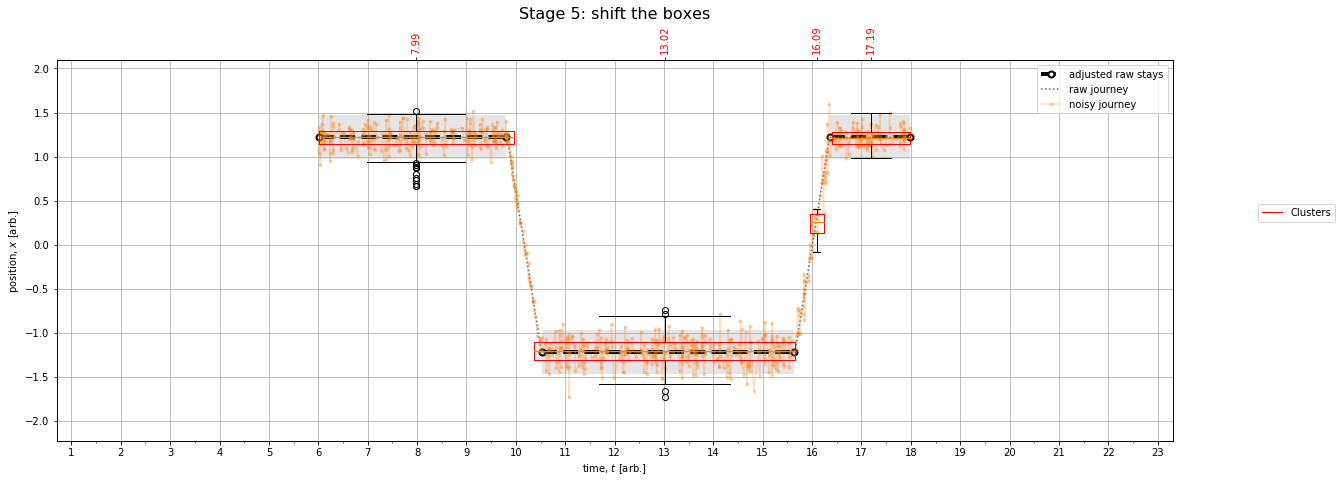

In [31]:
fig, ax = plt.subplots(1,1,figsize=[20,7])

ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.set_xlim(0.7,23.3)
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
add_plot_cluster_boxplots(t_arr, x_arr, all_clusters[-1], dist_thresh, ax)
ax.set_ylim(ylim);
ax.set_title(f"{stage_titels[-1]}", fontsize=16);

### Stage 6: filter regions by IQR

In [32]:
iqr_trim = True
stage_titel = f"Stage {6}: filter regions by IQR"
if verbose: print(stage_titel)
if iqr_trim:        
    clusters = get_iqr_filtered_clusters(x_arr, clusters, 1.5)
    all_clusters.append(clusters.copy())
    if verbose:
        print(len(clusters), "Clusters:")
        print_clusts(clusters);
        print()
else: 
    if verbose: 
        print("No IQR-trim\n")
stage_titels.append(stage_titel)

Stage 6: filter regions by IQR
4 Clusters:
[   0, 301]
[ 343, 702]
[ 730, 743]
[ 769, 873]



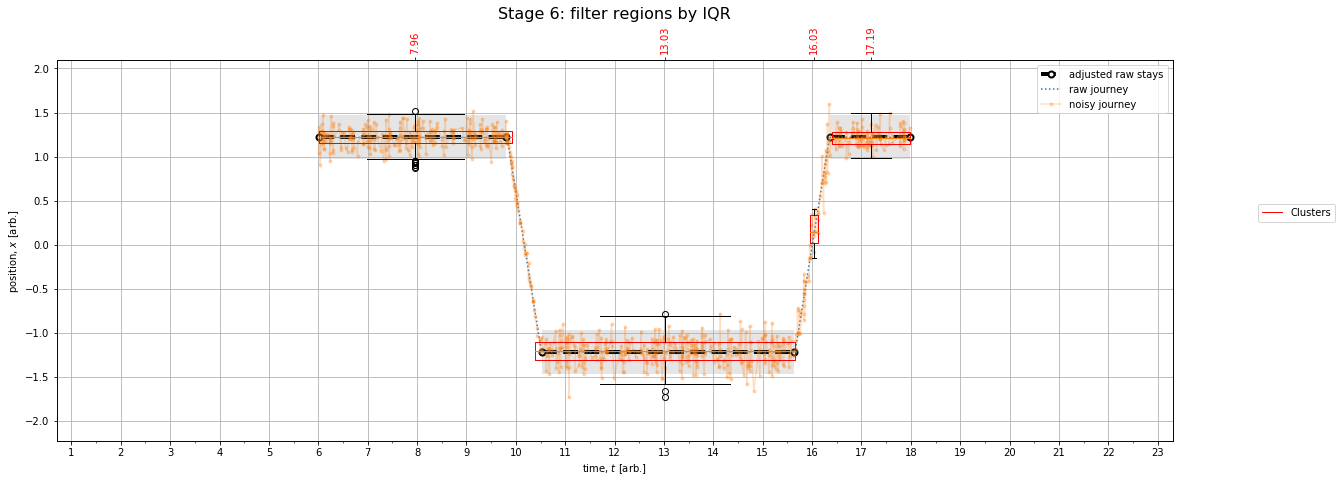

In [33]:
fig, ax = plt.subplots(1,1,figsize=[20,7])

ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.set_xlim(0.7,23.3)
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
add_plot_cluster_boxplots(t_arr, x_arr, all_clusters[-1], dist_thresh, ax)
ax.set_ylim(ylim);
ax.set_title(f"{stage_titels[-1]}", fontsize=16);

## Additional measures

In [34]:
from stay_classification.metric_box_classifier.metric_box_classifier_gaps import get_clust_metrics, get_gap_metrics

In [35]:
clust_set_nr = 5

print(f"  IQR-len,    dur,  dmedi,   dmea,   mean, median")
for n in range(len(all_clusters[clust_set_nr])):
    if n == 0:
        printstr = get_clust_metrics(all_clusters[clust_set_nr][n], t_arr, x_arr, time_thresh)
        print(f"{n:4d} {printstr}")
    else:
        printstr = get_gap_metrics(all_clusters[clust_set_nr][n-1],all_clusters[clust_set_nr][n], t_arr, x_arr, time_thresh)
        print(f"     {printstr}")
        printstr = get_clust_metrics(all_clusters[clust_set_nr][n], t_arr, x_arr, time_thresh)
        print(f"{n:4d} {printstr}")


  IQR-len,    dur,  dmedi,   dmea,   mean, median
   0  302,  3.915,   ----,   ----,  1.215,  1.223
       43,  0.469,  2.430,  2.426,  0.115,  0.249  
   1  360,  5.274,   ----,   ----, -1.211, -1.207
       29,  0.287,  1.353,  1.365, -0.661, -0.694  
   2   14,  0.161,   ----,   ----,  0.154,  0.146
       27,  0.284,  1.069,  1.065,  0.879,  0.823  
   3  105,  1.593,   ----,   ----,  1.219,  1.215


In [ ]:
from helper__3stays_v3_scripts__eval import get_segments_scores